In [4]:



import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVC,NuSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
dataset = read_csv('avocado.csv', header=None)

In [6]:
dataset.shape

(16469, 14)

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,Date,AveragePrice,Total Volume,4046.00,4225.00,4770.00,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16469 entries, 0 to 16468
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1517 non-null   float64
 1   1       1518 non-null   object 
 2   2       1518 non-null   object 
 3   3       1518 non-null   object 
 4   4       1518 non-null   float64
 5   5       1518 non-null   float64
 6   6       1518 non-null   float64
 7   7       1518 non-null   object 
 8   8       1518 non-null   object 
 9   9       1518 non-null   object 
 10  10      1518 non-null   object 
 11  11      1518 non-null   object 
 12  12      1518 non-null   object 
 13  13      1518 non-null   object 
dtypes: float64(4), object(10)
memory usage: 1.8+ MB


In [9]:
dataset.drop(dataset.tail(14952).index,inplace=True)

In [10]:
dataset.shape

(1517, 14)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1516 non-null   float64
 1   1       1517 non-null   object 
 2   2       1517 non-null   object 
 3   3       1517 non-null   object 
 4   4       1517 non-null   float64
 5   5       1517 non-null   float64
 6   6       1517 non-null   float64
 7   7       1517 non-null   object 
 8   8       1517 non-null   object 
 9   9       1517 non-null   object 
 10  10      1517 non-null   object 
 11  11      1517 non-null   object 
 12  12      1517 non-null   object 
 13  13      1517 non-null   object 
dtypes: float64(4), object(10)
memory usage: 177.8+ KB


In [12]:
dataset.isnull().head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,Date,AveragePrice,Total Volume,4046.00,4225.00,4770.00,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany


# drop NaN column

In [14]:
cols = [0]
dataset.drop(dataset.columns[cols],axis=1,inplace=True)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1517 non-null   object 
 1   2       1517 non-null   object 
 2   3       1517 non-null   object 
 3   4       1517 non-null   float64
 4   5       1517 non-null   float64
 5   6       1517 non-null   float64
 6   7       1517 non-null   object 
 7   8       1517 non-null   object 
 8   9       1517 non-null   object 
 9   10      1517 non-null   object 
 10  11      1517 non-null   object 
 11  12      1517 non-null   object 
 12  13      1517 non-null   object 
dtypes: float64(3), object(10)
memory usage: 165.9+ KB


In [16]:
dataset.head()


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,AveragePrice,Total Volume,4046.00,4225.00,4770.00,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany


# arrange first row as column header

In [17]:
dataset.rename(columns=dataset.iloc[0], inplace = True)
dataset.drop([0], inplace = True)

In [18]:
dataset

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,29-11-2015,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,23-10-2016,1.52,167741.27,54981.90,39749.81,20290.31,52719.25,47060.46,5658.79,0,conventional,2016,Charlotte
1513,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1514,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.7,54704.14,8596.56,0,conventional,2016,Charlotte
1515,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825,conventional,2016,Charlotte


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 1 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1516 non-null   object 
 1   AveragePrice  1516 non-null   object 
 2   Total Volume  1516 non-null   object 
 3   4046.0        1516 non-null   float64
 4   4225.0        1516 non-null   float64
 5   4770.0        1516 non-null   float64
 6   Total Bags    1516 non-null   object 
 7   Small Bags    1516 non-null   object 
 8   Large Bags    1516 non-null   object 
 9   XLarge Bags   1516 non-null   object 
 10  type          1516 non-null   object 
 11  year          1516 non-null   object 
 12  region        1516 non-null   object 
dtypes: float64(3), object(10)
memory usage: 165.8+ KB


In [20]:
dataset.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,29-11-2015,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany


In [21]:
dataset.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,29-11-2015,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany


In [22]:
for col in dataset.columns: 
    print(col) 

Date
AveragePrice
Total Volume
4046.0
4225.0
4770.0
Total Bags
Small Bags
Large Bags
XLarge Bags
type
year
region


In [23]:
dataset.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,29-11-2015,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany


In [24]:
dataset['AveragePrice'] = dataset['AveragePrice'].astype(float)

In [25]:
dataset['Total Volume'] = dataset['Total Volume'].astype(float)

In [26]:
dataset['Total Bags'] = dataset['Total Bags'].astype(float)

In [27]:
dataset['Small Bags'] = dataset['Small Bags'].astype(float)

In [28]:
dataset['Large Bags'] = dataset['Large Bags'].astype(float)

In [29]:
dataset['XLarge Bags'] = dataset['XLarge Bags'].astype(float)

In [30]:
dataset['year'] = dataset['year'].astype(int)

In [31]:
dataset.isnull().values.any()

False

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 1 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1516 non-null   object 
 1   AveragePrice  1516 non-null   float64
 2   Total Volume  1516 non-null   float64
 3   4046.0        1516 non-null   float64
 4   4225.0        1516 non-null   float64
 5   4770.0        1516 non-null   float64
 6   Total Bags    1516 non-null   float64
 7   Small Bags    1516 non-null   float64
 8   Large Bags    1516 non-null   float64
 9   XLarge Bags   1516 non-null   float64
 10  type          1516 non-null   object 
 11  year          1516 non-null   int64  
 12  region        1516 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 165.8+ KB


In [33]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Month']=dataset['Date'].apply(lambda x:x.month)
dataset['Day']=dataset['Date'].apply(lambda x:x.day)

In [34]:
dataset.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
4,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [35]:
dataset.describe()

,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1516.000000,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1.516000e+03,1516.000000,1516.000000,1516.000000,1516.000000
mean,1.074756,1.602815e+06,6.468366e+05,6.118051e+05,5.042782e+04,2.937455e+05,2.488998e+05,4.266249e+04,2183.210237,2015.162269,6.360818,15.251979
std,0.188733,4.434456e+06,1.948195e+06,1.673397e+06,1.378240e+05,7.582047e+05,6.476715e+05,1.182520e+05,7457.961586,0.368819,3.472631,8.968583
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.977500,1.474583e+05,2.037795e+04,4.147423e+04,9.070825e+02,3.619777e+04,2.971965e+04,5.379375e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.035468e+05,8.208386e+04,1.189817e+05,7.670935e+03,7.409224e+04,6.240528e+04,5.027430e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.824590e+05,3.778713e+05,4.852986e+05,2.927145e+04,1.576887e+05,1.462548e+05,2.937044e+04,403.130000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Average Price')

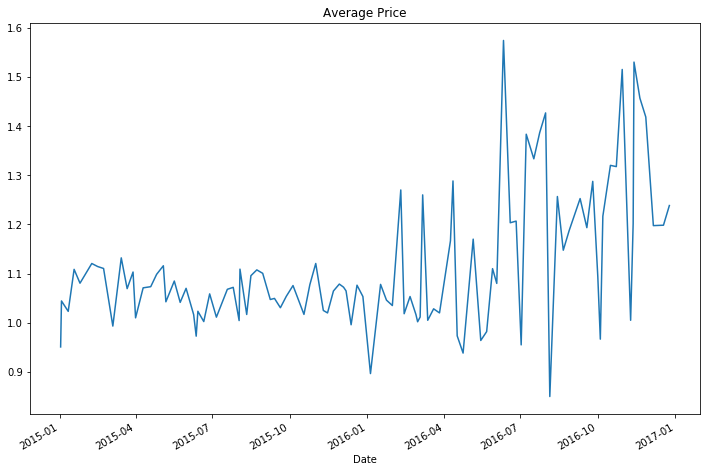

In [37]:
byDate=dataset.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

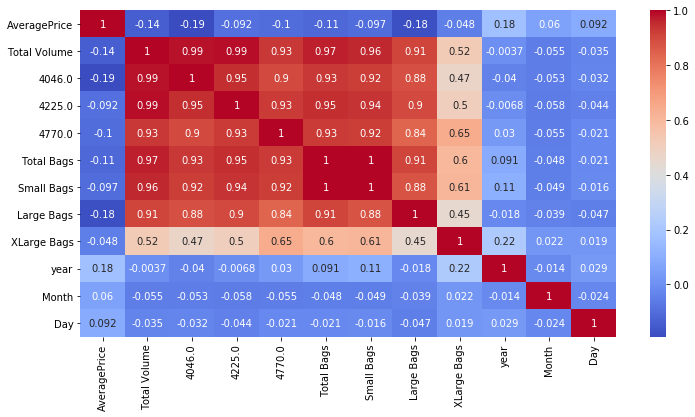

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

In [39]:
df_final=pd.get_dummies(dataset.drop(['region','Date'],axis=1),drop_first=True)

In [40]:
df_final.head()

,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
1,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
2,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
3,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
4,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
5,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 1 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1516 non-null   float64
 1   Total Volume  1516 non-null   float64
 2   4046.0        1516 non-null   float64
 3   4225.0        1516 non-null   float64
 4   4770.0        1516 non-null   float64
 5   Total Bags    1516 non-null   float64
 6   Small Bags    1516 non-null   float64
 7   Large Bags    1516 non-null   float64
 8   XLarge Bags   1516 non-null   float64
 9   year          1516 non-null   int64  
 10  Month         1516 non-null   int64  
 11  Day           1516 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 154.0 KB


In [42]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12349664631334394
MSE: 0.025349271063535104
RMSE: 0.15921454413317618


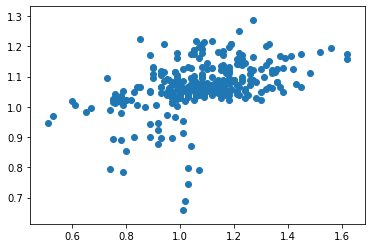

In [45]:
plt.scatter(x=y_test,y=pred)

In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

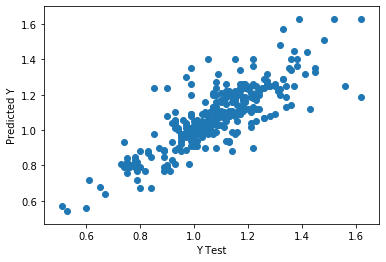

In [47]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 0.07460526315789473
MSE: 0.01119144736842105
RMSE: 0.10578963733949111


In [49]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.056313157894736864
MSE: 0.006175419473684216
RMSE: 0.07858383722931972


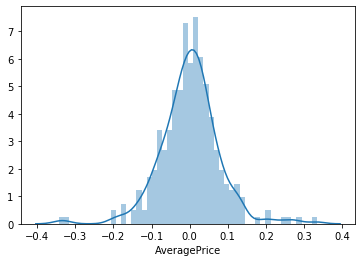

In [51]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
52,1.22,1.2058
169,1.20,1.1983
1470,1.07,1.1575
927,1.16,1.1674
423,1.14,1.1939


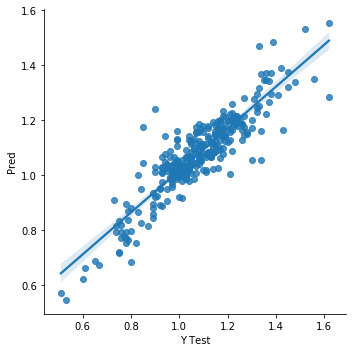

In [52]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# now we use classifier with target "region" 

# now we execute classifier with label encoding with target region

In [400]:
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [401]:
data = read_csv('avocado.csv', header=None)

In [402]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,Date,AveragePrice,Total Volume,4046.00,4225.00,4770.00,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany


In [403]:
data.drop(data.tail(14952).index,inplace=True)

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1516 non-null   float64
 1   1       1517 non-null   object 
 2   2       1517 non-null   object 
 3   3       1517 non-null   object 
 4   4       1517 non-null   float64
 5   5       1517 non-null   float64
 6   6       1517 non-null   float64
 7   7       1517 non-null   object 
 8   8       1517 non-null   object 
 9   9       1517 non-null   object 
 10  10      1517 non-null   object 
 11  11      1517 non-null   object 
 12  12      1517 non-null   object 
 13  13      1517 non-null   object 
dtypes: float64(4), object(10)
memory usage: 177.8+ KB


In [405]:
cols = [0]
data.drop(data.columns[cols],axis=1,inplace=True)

In [406]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,AveragePrice,Total Volume,4046.00,4225.00,4770.00,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany


In [407]:
data.rename(columns=data.iloc[0], inplace = True)
data.drop([0], inplace = True)

In [408]:
data.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,29-11-2015,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany


In [409]:
data.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0,conventional,2015,Albany
5,29-11-2015,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,conventional,2015,Albany


In [410]:
data['AveragePrice'] = data['AveragePrice'].astype(float)

In [411]:
data['Total Volume'] = data['Total Volume'].astype(float)

In [412]:
data['Total Bags'] = data['Total Bags'].astype(float)

In [413]:
data['Small Bags'] = data['Small Bags'].astype(float)

In [414]:
data['Large Bags'] = data['Large Bags'].astype(float)

In [415]:
data['XLarge Bags'] = data['XLarge Bags'].astype(float)

In [416]:
data['year'] = data['year'].astype(int)

In [417]:
data.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
5,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 1 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1516 non-null   object 
 1   AveragePrice  1516 non-null   float64
 2   Total Volume  1516 non-null   float64
 3   4046.0        1516 non-null   float64
 4   4225.0        1516 non-null   float64
 5   4770.0        1516 non-null   float64
 6   Total Bags    1516 non-null   float64
 7   Small Bags    1516 non-null   float64
 8   Large Bags    1516 non-null   float64
 9   XLarge Bags   1516 non-null   float64
 10  type          1516 non-null   object 
 11  year          1516 non-null   int64  
 12  region        1516 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 165.8+ KB


In [419]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [420]:
data.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
4,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [421]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 1 to 1516
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1516 non-null   datetime64[ns]
 1   AveragePrice  1516 non-null   float64       
 2   Total Volume  1516 non-null   float64       
 3   4046.0        1516 non-null   float64       
 4   4225.0        1516 non-null   float64       
 5   4770.0        1516 non-null   float64       
 6   Total Bags    1516 non-null   float64       
 7   Small Bags    1516 non-null   float64       
 8   Large Bags    1516 non-null   float64       
 9   XLarge Bags   1516 non-null   float64       
 10  type          1516 non-null   object        
 11  year          1516 non-null   int64         
 12  region        1516 non-null   object        
 13  Month         1516 non-null   int64         
 14  Day           1516 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [422]:
data.head()

,Date,AveragePrice,Total Volume,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
1,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
2,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
3,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
4,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
5,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 1 to 1516
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1516 non-null   datetime64[ns]
 1   AveragePrice  1516 non-null   float64       
 2   Total Volume  1516 non-null   float64       
 3   4046.0        1516 non-null   float64       
 4   4225.0        1516 non-null   float64       
 5   4770.0        1516 non-null   float64       
 6   Total Bags    1516 non-null   float64       
 7   Small Bags    1516 non-null   float64       
 8   Large Bags    1516 non-null   float64       
 9   XLarge Bags   1516 non-null   float64       
 10  type          1516 non-null   object        
 11  year          1516 non-null   int64         
 12  region        1516 non-null   object        
 13  Month         1516 non-null   int64         
 14  Day           1516 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int6

In [424]:
for col in data.columns: 
    print(col) 


Date
AveragePrice
Total Volume
4046.0
4225.0
4770.0
Total Bags
Small Bags
Large Bags
XLarge Bags
type
year
region
Month
Day


In [434]:
data.drop(['Date','AveragePrice','Total Volume','Month','Day','year','type'],axis = 1,inplace=True) 


In [435]:
data.head()

,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,region
1,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
2,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
3,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
4,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
5,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


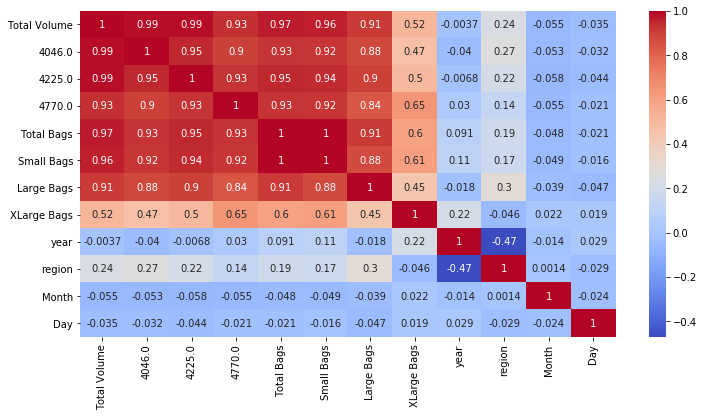

In [473]:

plt.figure(figsize=(12,6))

sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

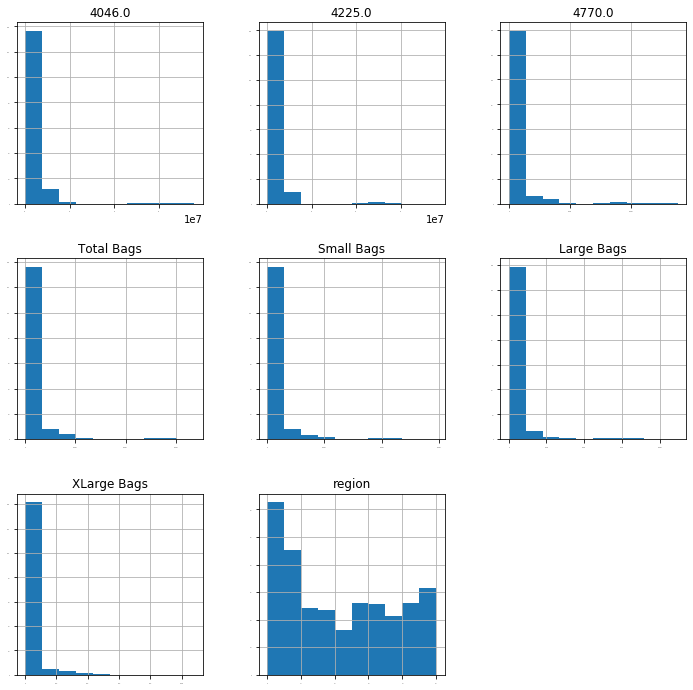

In [475]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()


In [474]:
# label encoding the data 
from sklearn import preprocessing

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['region']= label_encoder.fit_transform(data['region'])

In [437]:
data.head()

,4046.0,4225.0,4770.0,Total Bags,Small Bags,Large Bags,XLarge Bags,region
1,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
2,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
3,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
4,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
5,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0


In [438]:
#Separating Feature and Target matrices
X = data.drop(['region'], axis=1)
y=data['region']

In [439]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [440]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [442]:

#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [443]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

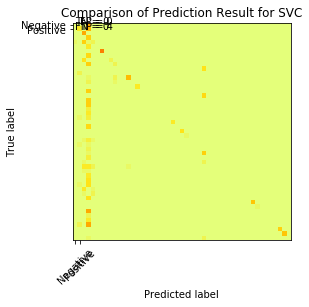

Accuracy of the Model SVC 33.2%


In [444]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

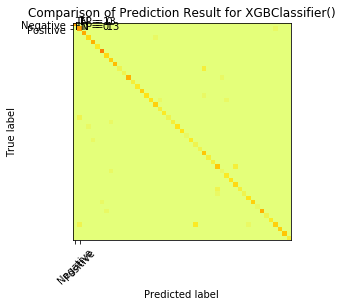

Accuracy of the Model XGBClassifier() 90.1%


In [446]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

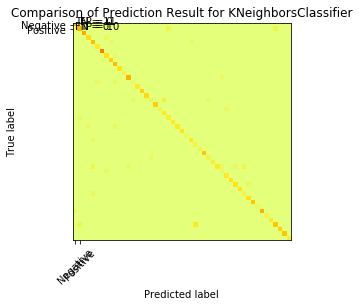

Accuracy of the Model KNeighborsClassifier 86.5%


In [447]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

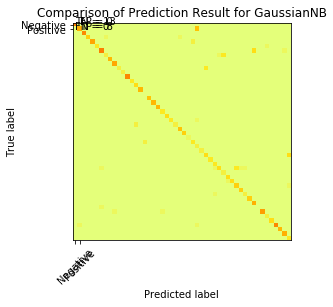

Accuracy of the Model GaussianNB 84.5%


In [448]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

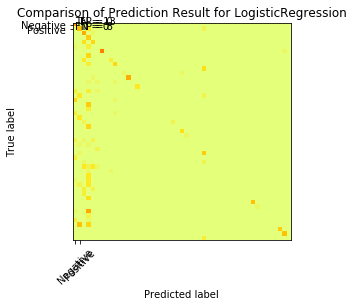

Accuracy of the Model LogisticRegression 41.4%


In [449]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

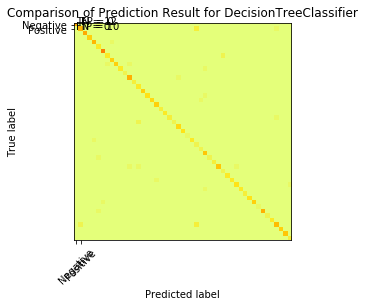

Accuracy of the Model DecisionTreeClassifier 89.5%


In [450]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

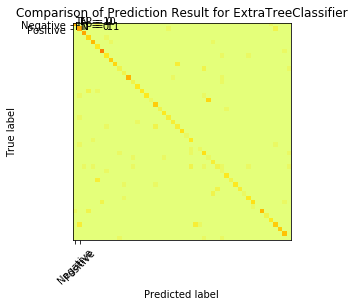

Accuracy of the Model ExtraTreeClassifier 72.4%


In [451]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

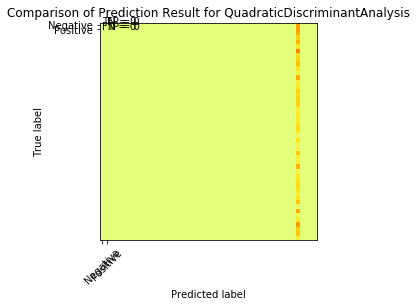

Accuracy of the Model QuadraticDiscriminantAnalysis 1.3%


In [452]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

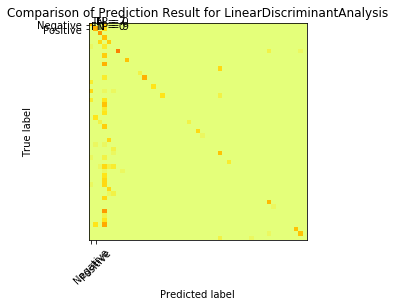

Accuracy of the Model LinearDiscriminantAnalysis 40.5%


In [453]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

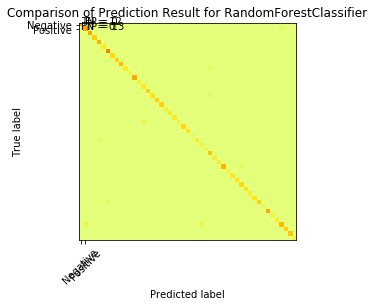

Accuracy of the Model RandomForestClassifier 95.7%


In [454]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

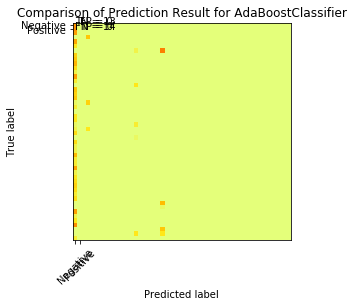

Accuracy of the Model AdaBoostClassifier 7.9%


In [455]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

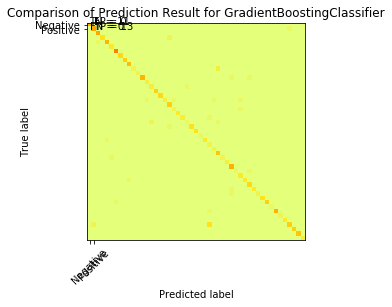

Accuracy of the Model GradientBoostingClassifier 87.8%


In [456]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

# Accuracy of the Model RandomForestClassifier 95.7% so best performer

In [489]:
#grid cv RandomForestClassifier
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



In [490]:
rfc=RandomForestClassifier(random_state=42)

In [491]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [492]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [493]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [494]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [499]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [504]:
rfc1.score(X_test, y_test)

0.8947368421052632

In [465]:
pred=rfc1.predict(X_test)

In [469]:
op_rf=rfc1.predict(X)

In [470]:
pred

array([ 0,  4,  6, 37, 15, 44,  1,  7,  6,  5, 46,  0, 38,  5,  0, 14, 34,
       24,  6, 38,  6,  6, 42, 31, 17, 12, 38,  8, 47, 26,  2, 28, 24, 17,
       36,  3,  1,  1, 47, 46, 22, 17,  3,  2,  6, 33, 31, 12, 44,  4,  1,
       49, 40,  6,  1, 36, 38, 36, 15,  2, 38,  2, 19, 41, 15, 25, 42, 31,
        0, 25, 36,  3,  1, 31,  6, 44,  9, 49, 32, 44,  8, 25, 47, 22,  7,
       40, 29, 19,  9, 10, 47, 12, 12, 13, 31,  5,  7, 37, 48,  1, 42,  3,
       12, 45, 22,  6,  0,  6, 11, 18,  4,  3, 39, 46, 50,  6,  3, 42, 28,
        9,  0,  1,  6, 31,  0, 22, 49,  9, 30,  2, 15, 12,  4, 12, 30, 48,
        1,  9,  4,  8, 12,  0, 48, 12, 10, 14, 15,  9, 14, 49, 20, 41, 12,
       25, 50,  7,  4, 44, 42, 38, 18,  6, 31, 39, 39, 41,  0, 15, 34,  4,
       19,  2, 44,  2, 44, 48, 15, 33, 41,  1,  1, 28,  2,  6,  5, 27, 19,
       26,  7, 34,  4,  5, 26, 17, 13, 47, 17,  2,  8, 32, 19,  6, 40,  4,
       44,  1, 46, 49,  9,  1, 26, 34, 48, 32,  6, 48, 11, 18,  1, 44,  8,
       39, 37, 12, 19, 50

# save model

In [484]:
from sklearn import linear_model

In [485]:
from joblib import dump,load

In [486]:
dump(rfc1,'RandomForestClassifier.joblib')

['RandomForestClassifier.joblib']